In [3]:
%matplotlib inline

import json
import requests
import re
import pickle
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

stops = set(stopwords.words("english"))

In [4]:
epa_fulltexts = requests.get("https://storage.googleapis.com/atriskwiki/epa_fulltext.txt").text.split("\n")

In [5]:
len(epa_fulltexts)

7527

In [6]:
pickle.dump(epa_fulltexts, open("epa_fulltexts.p","wb"))

In [7]:
trial = json.loads(epa_fulltexts[16])
text = trial[list(trial.keys())[0]]
intro = re.compile(r"==.*?==").split(text)[0] #splits text into sections
intro = re.sub(r"\n"," ",intro)
intro = re.sub(r"[^A-Za-z0-9 ]","",intro)
intro = re.sub(r"\d+","num",intro)
intro = intro.lower()
intro_words = intro.split()
intro_words = [w for w in intro_words if w not in stops]
intro_words = [stemmer.stem(w) for w in intro_words]
intro_words

['art',
 'divers',
 'rang',
 'human',
 'activ',
 'creat',
 'visual',
 'auditori',
 'perform',
 'artifact',
 'artwork',
 'express',
 'author',
 'imagin',
 'technic',
 'skill',
 'intend',
 'appreci',
 'beauti',
 'emot',
 'power',
 'gener',
 'form',
 'activ',
 'includ',
 'product',
 'work',
 'art',
 'critic',
 'art',
 'studi',
 'histori',
 'art',
 'aesthet',
 'dissemin',
 'art',
 'oldest',
 'document',
 'form',
 'art',
 'visual',
 'art',
 'includ',
 'creation',
 'imag',
 'object',
 'field',
 'includ',
 'paint',
 'sculptur',
 'printmak',
 'photographi',
 'visual',
 'media',
 'architectur',
 'often',
 'includ',
 'one',
 'visual',
 'art',
 'howev',
 'like',
 'decor',
 'art',
 'advertis',
 'involv',
 'creation',
 'object',
 'practic',
 'consider',
 'use',
 'essentialin',
 'way',
 'usual',
 'paint',
 'exampl',
 'music',
 'theatr',
 'film',
 'danc',
 'perform',
 'art',
 'well',
 'literatur',
 'media',
 'interact',
 'media',
 'includ',
 'broader',
 'definit',
 'art',
 'art',
 'numth',
 'centuri'

In [8]:
def GetAndCleanArticle(text, fulltext=False):
    """Expects a string containing a wikipedia article formatted with explaintext and exsectionformat=wiki
    Returns a list containing all Porter stemmed non-stop words from the introductory section of the article
    (can be set to process the entire article with fulltext=True)"""
    if not fulltext:
        intro = re.compile("==.*?==").split(text)[0]
    else:
        intro = text
    intro = re.sub(r"\n"," ",intro)
    intro = re.sub(r"[^A-Za-z ]","",intro)
    intro = intro.lower()
    intro_words = intro.split()
    intro_words = [stemmer.stem(w) for w in intro_words if w not in stops]
    return " ".join(intro_words)

In [9]:
processedIntros = dict()
epa_fulltexts.pop() #final record is empty, this removes it

for (ix, ft) in enumerate(epa_fulltexts):
    ftj = json.loads(ft)
    aid = list(ftj.keys())[0]
    processedIntros[aid] = GetAndCleanArticle(ftj[aid])

In [10]:
df_intro = pd.DataFrame.from_dict(processedIntros,orient="index")
df_intro.index.name = 'article_id'
df_intro.columns = ['intro_stems']

In [11]:
df_intro

,intro_stems
article_id,
518963,list urdu languag poet arrang date birth ital ...
2428789,list singl peak top billboard hot
7063,catapult ballist devic use launch projectil gr...
882116,dharavi local mumbai maharashtra india hous on...
11403575,sli cooper franchis center seri platform steal...
14142805,georgia bulldog footbal team repres univers ge...
11379493,clan children tv channel spanish public servic...
19065069,alexand bori de pfeffel johnson born june brit...
50109817,


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features = 500)
vec_words = vectorizer.fit_transform(df_intro["intro_stems"])

In [29]:
arr_vocab = vec_words.toarray()
max_count = np.sum(arr_vocab,axis=0)
vocab = vectorizer.get_feature_names()

for word, high in zip(vocab,max_count):
    print("{}: {}".format(word, high))


accord: 528
achiev: 407
act: 767
action: 406
activ: 618
actor: 824
actress: 458
addit: 555
africa: 313
age: 769
air: 716
album: 2424
along: 493
also: 4305
although: 720
america: 714
american: 2868
among: 711
ancient: 428
anim: 1118
announc: 437
anoth: 337
appear: 1199
approxim: 313
april: 698
arab: 470
area: 891
armi: 427
around: 660
art: 486
artist: 852
asia: 397
associ: 816
attack: 457
august: 628
australia: 428
australian: 304
author: 675
award: 2117
back: 391
band: 874
base: 932
basketbal: 381
battl: 333
bc: 320
becam: 1487
becom: 780
began: 855
begin: 361
believ: 349
best: 1214
billboard: 583
billion: 380
black: 490
bodi: 473
book: 870
born: 2294
british: 1005
broadcast: 342
build: 311
busi: 319
california: 362
call: 1263
campaign: 425
canada: 412
capit: 381
career: 829
case: 401
cast: 320
caus: 629
center: 446
central: 527
centuri: 1335
champion: 394
championship: 590
chang: 568
channel: 417
charact: 876
chart: 655
child: 309
children: 516
china: 365
christian: 445
church: 528
ci

In [32]:
bin_vocab = arr_vocab > np.zeros(arr_vocab.shape)
pres_count = np.sum(bin_vocab, axis=0)
with open("top500_epa_appearance_rate.csv", "w") as f:
    f.write("stem_word,occurrence_rate")
    for word, pres in zip(vocab, pres_count):
        f.write("{},{:.3f}\n".format(word, pres/7526))

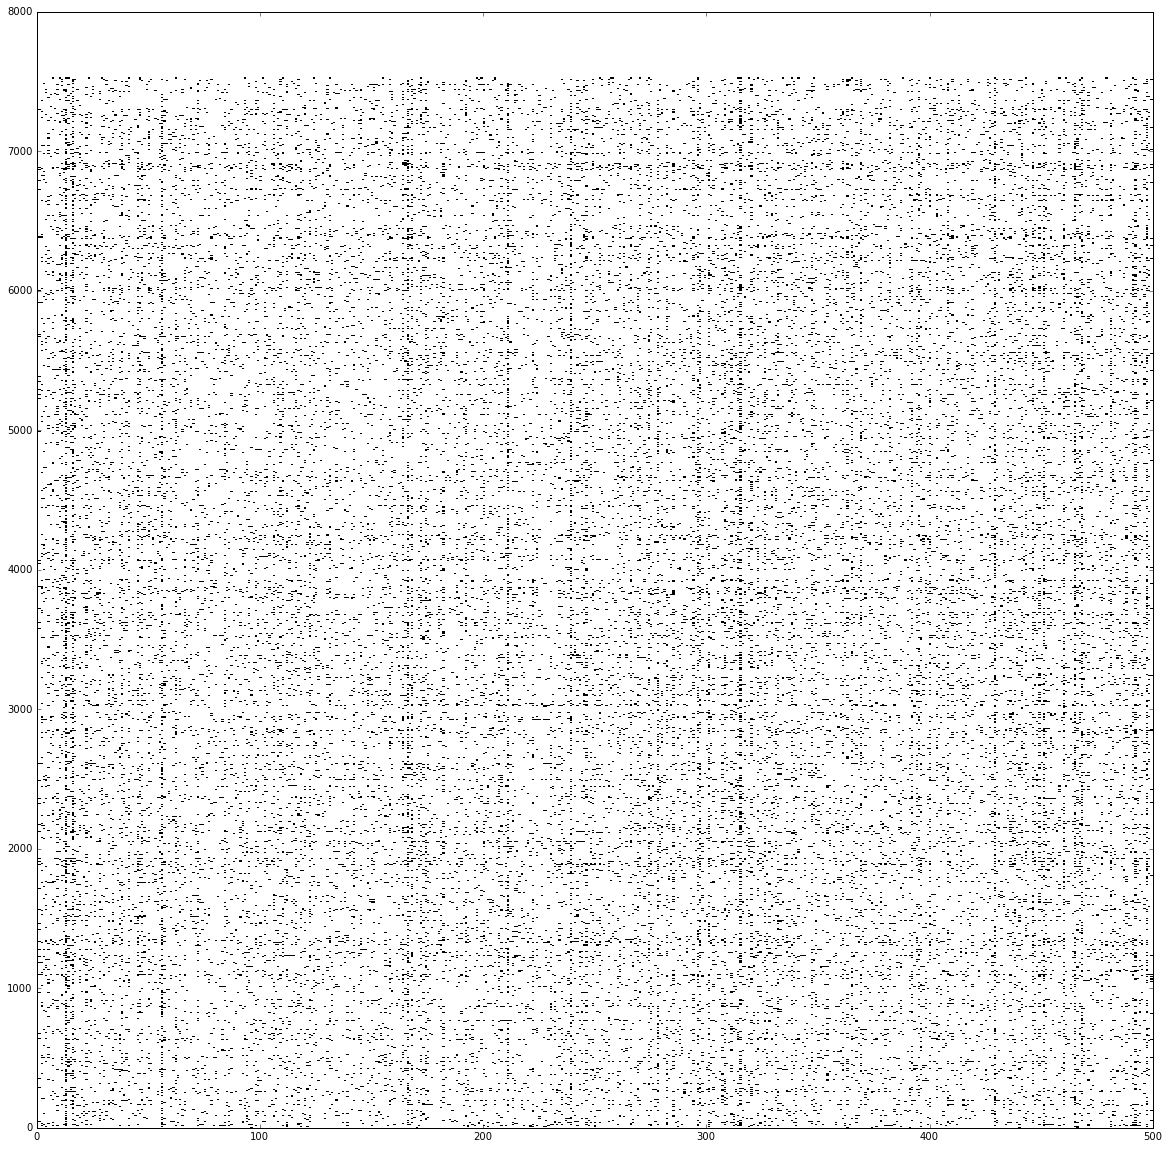

In [31]:
plt.figure(figsize=(20,20))
plt.pcolor(bin_vocab, cmap=plt.get_cmap("Greys"))
plt.show()

In [16]:
vocab_features = pd.DataFrame(arr_vocab,index=df_intro.index,columns=vocab)

In [17]:
from sklearn.cluster import KMeans
clust = KMeans(n_clusters=8)
clust.fit(vocab_features)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [18]:
KClass = clust.predict(vocab_features)
KClass = pd.Series(KClass, index=vocab_features.index)

In [19]:
vocab_features['class'] = pd.Series(clust.labels_,index=vocab_features.index)
epa = pd.read_csv("../WikiSQL/070916_edit_protected_articles.csv")

epa.index = epa['page_id']
title = pd.Series(epa['page_title'],index=epa.index)
title_by_class = pd.concat([title,KClass], axis=1)
KClass

/Users/brian/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)


article_id
518963      3
2428789     3
7063        3
882116      3
11403575    4
14142805    3
11379493    3
19065069    5
50109817    3
67119       5
38310       3
24872       3
42093986    3
221151      3
43430583    3
23627       5
30635       5
2324040     3
31650381    3
5118400     3
23056       5
46663467    3
241681      5
381399      5
14203213    5
154826      3
18862135    3
745066      5
11835861    3
4070755     3
           ..
797883      3
1447808     3
19230789    3
492331      3
6050919     6
1656784     5
31083420    3
1449313     3
1818254     3
127575      7
14977578    3
49225078    3
1291598     6
34028475    6
31088       3
24308744    3
35307857    0
3156617     3
24045036    3
22235555    3
1519943     3
40719608    3
27868296    6
19327028    3
239101      3
226238      3
6931338     5
20652023    3
18407643    3
12581       5
dtype: int32